In [1]:
import xarray as xr
import h5py as h5
import re
import numpy as np
import pyproj
import matplotlib.pyplot as plt
from os import listdir
from scipy.interpolate import griddata


Find summer average over all years:

In [2]:
# get available years from directory
years = listdir(f'/home/htweedie/melt_ponds/data/OLCI/olci')
years.remove('LongitudeLatitudeGrid-n12500-Arctic.h5')
years.remove('readme.txt')

# set momths to retrieve and plot
months = ['05', '06', '07', '08', '09']

annual_mpfs = []
daily_mpfs_year = []


for year in years:
    monthly_mpfs = []

    for month in months:
        # set the number of days for the given month
        match month:
            case '05' | '07' | '08':
                days = 31
            case '06':
                days = 30

        # initialise empty list to store mpf for each day
        daily_mpfs = []
        for day in range(days):
            # start days from 1 rather than 0
            day += 1
            # configure days as strings to work with file names
            if day < 10:
                day = f'0{day}'
            else:
                day = str(day)

            # retrieve data for given day. If the file doesn't exist, skip it.
            try:
                fn = f'/home/htweedie/melt_ponds/data/OLCI/olci/{year}/data/mpd1_{year}{month}{day}.nc'
                ds = xr.open_dataset(fn)
                mpf = ds['mpf']
                daily_mpfs.append(np.array(mpf))

            except Exception as e:
                print(f'Data could not be retrieved for {day}/{month}/{year}: {e}')
                continue

        monthly_mpfs.append(np.nanmean(daily_mpfs, 0))
        print(f"Found mean for {month}")

    # find mean of all months
    annual_mpfs.append(np.nanmean(monthly_mpfs, 0))
    print(f"Found mean for {year}")

long_term_mean = np.nanmean(annual_mpfs, 0)

/tmp/ipykernel_282186/2411708609.py:42: RuntimeWarning: Mean of empty slice
  monthly_mpfs.append(np.nanmean(daily_mpfs, 0))


Found mean for 06
Found mean for 07
Found mean for 08
Found mean for 2020


/tmp/ipykernel_282186/2411708609.py:46: RuntimeWarning: Mean of empty slice
  annual_mpfs.append(np.nanmean(monthly_mpfs, 0))


Found mean for 06
Found mean for 07
Data could not be retrieved for 01/08/2017: [Errno 2] No such file or directory: b'/home/htweedie/melt_ponds/data/OLCI/olci/2017/data/mpd1_20170801.nc'
Data could not be retrieved for 02/08/2017: [Errno 2] No such file or directory: b'/home/htweedie/melt_ponds/data/OLCI/olci/2017/data/mpd1_20170802.nc'
Data could not be retrieved for 03/08/2017: [Errno 2] No such file or directory: b'/home/htweedie/melt_ponds/data/OLCI/olci/2017/data/mpd1_20170803.nc'
Found mean for 08
Found mean for 2017
Found mean for 06
Found mean for 07
Found mean for 08
Found mean for 2018
Found mean for 06
Found mean for 07
Found mean for 08
Found mean for 2019
Found mean for 06
Found mean for 07
Found mean for 08
Found mean for 2021
Found mean for 06
Found mean for 07
Found mean for 08
Found mean for 2022
Found mean for 06
Found mean for 07
Found mean for 08
Found mean for 2023


/tmp/ipykernel_282186/2411708609.py:49: RuntimeWarning: Mean of empty slice
  long_term_mean = np.nanmean(annual_mpfs, 0)


Retrieve data for a given year, then find monthly averages for June, July and August, and the mean over all three:

In [7]:
fn = f'/home/htweedie/melt_ponds/data/OLCI/olci/2019/data/mpd1_20190502.nc'
ds = xr.open_dataset(fn)
np.shape(ds['mpf'])

(896, 608)

/tmp/ipykernel_273769/880041101.py:34: RuntimeWarning: Mean of empty slice
  monthly_mpfs.append(np.nanmean(daily_mpfs, 0))
/tmp/ipykernel_273769/880041101.py:37: RuntimeWarning: Mean of empty slice
  mean_summer_mpf = np.nanmean(monthly_mpfs, 0)


NameError: name 'long_term_mean' is not defined

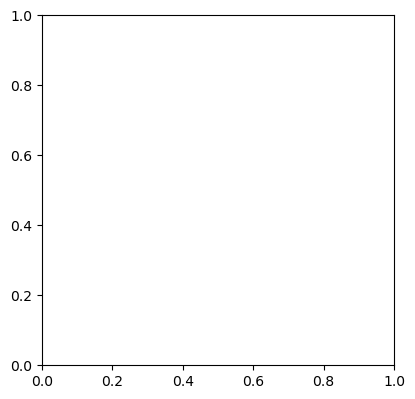

In [2]:
YEAR = '2020'
months = ['06', '07', '08']

monthly_mpfs = []

for month in months:
    # set the number of days for the given month
    match month:
        case '05' | '07' | '08':
            days = 31
        case '06':
            days = 30

    # initialise empty list to store mpf for each day
    daily_mpfs = []
    for day in range(days):
        # start days from 1 rather than 0
        day += 1
        # configure days as strings to work with file names
        if day < 10:
            day = f'0{day}'
        else:
            day = str(day)

        # retrieve data for given day. If the file doesn't exist, skip it.
        try:
            fn = f'/home/htweedie/melt_ponds/data/OLCI/olci/{YEAR}/data/mpd1_{YEAR}{month}{day}.nc'
            ds = xr.open_dataset(fn)
            mpf = ds['mpf']
            daily_mpfs.append(np.array(mpf))
        except Exception as e:
            print(f'Data could not be retrieved for {day}/{month}/{YEAR}: {e}')
            continue
    monthly_mpfs.append(np.nanmean(daily_mpfs, 0))

# find mean of all months
mean_summer_mpf = np.nanmean(monthly_mpfs, 0)

# plot each month and the mean
fig = plt.figure(figsize=(10,10))
plt.set_cmap('bwr')

plt.subplot(221)
plt.pcolormesh(monthly_mpfs[0][150:650] - long_term_mean[150:650])
plt.title(f'Observed MPF June {YEAR}')

plt.subplot(222)
plt.pcolormesh(monthly_mpfs[1][150:650] - long_term_mean[150:650])
plt.title(f'Observed MPF July {YEAR}')

plt.subplot(223)
plt.pcolormesh(monthly_mpfs[2][150:650] - long_term_mean[150:650])
plt.title(f'Observed MPF August {YEAR}')

plt.subplot(224)
plt.pcolormesh(mean_summer_mpf[150:650] - long_term_mean[150:650])
plt.title(f'Observed MPF Mean {YEAR}')

plt.subplots_adjust(bottom=0.1, right=0.8, top=0.9)
cax = plt.axes((0.85, 0.1, 0.075, 0.8))
plt.colorbar(cax=cax)
    

In [3]:
def load_MISR(MISR_path):
    '''Loads MISR data and coordinates from specified file path.

    Params:
        MISR_path (str): the file path from which to retrieve data

    Returns:
        data (np.array): roughness data retrieved from the specified file
        lon, lat
        x, y
    '''

    file = h5.File(MISR_path, 'r')
    
    # extract coord data
    lon = np.array(file['GeoLocation']['Longitude'])
    lat = np.array(file['GeoLocation']['Latitude'])
    x = np.array(file['GeoLocation']['x'])
    y = np.array(file['GeoLocation']['y'])

    # extract roughness data
    data = np.array(file['Roughness']['Roughness_2D_svm'])    
    
    file.close()

    return data, lon, lat, x, y


def interpolate_to_MISR(x_in, y_in, data, x_out, y_out):
    '''
    Interpolates data of the shape x_in, y_in to the shape of x_out, y_out.
    
    Params:
        data: the data to be interpolated
        x_in, y_in: the shape of the data to be interpolated
        
    Returns:
        x_out, y_out: the shape to which the data will be interpolated'''
    return griddata((x_in.ravel(), y_in.ravel()), data.ravel( ), (x_out.ravel(), y_out.ravel()), 'nearest').reshape(8000,8000) 


def WGS84toEASE2N(lon, lat):
    '''Converts WGS84 coordinates to EASE2N.

    Params:
        lon (array): the WGS84 longitude to convert
        lat (array): the WGS84 latitude to convert

    Returns:
        (x, y): the corresponding EASE2N x and y coordinates
    '''

    proj_EASE2N = pyproj.Proj("+proj=laea +lon_0=0 +lat_0=90 +x_0=0 +y_0=0 +ellps=WGS84 +towgs84=0,0,0,0,0,0,0 +units=m +no_defs")
    proj_WGS84 = pyproj.Proj("+proj=longlat +ellps=WGS84 +datum=WGS84 +no_defs ")
    return pyproj.transform(proj_WGS84, proj_EASE2N, lon, lat)


def predict_mpf(SIR, R0, l, tau, hnet):
    '''
    Predicts meltpond fraction given an input SIR, based on the model by Landy et al, 2015.
    '''
    R = R0 * np.exp(-l * (SIR*1.1)) + tau
    return (1 - np.exp(-R * hnet))



In [4]:
# retrieve MPF coordinates
coord_fn = '/home/htweedie/melt_ponds/data/OLCI/olci/LongitudeLatitudeGrid-n12500-Arctic.h5'
coords = h5.File(coord_fn, 'r')
mpf_lon =  np.array(coords['Longitudes'])
mpf_lat = np.array(coords['Latitudes'])
x_mpf, y_mpf = WGS84toEASE2N(mpf_lon, mpf_lat)


/tmp/ipykernel_273769/1118689035.py:55: FutureWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  return pyproj.transform(proj_WGS84, proj_EASE2N, lon, lat)


In [5]:
# retrieve MISR data and coordinates
MISR_path = f'/home/ssureen/MISR_data_monthly/April {YEAR} Roughness.h5'
MISR, lon_MISR, lat_MISR, x_MISR, y_MISR = load_MISR(MISR_path)

In [6]:
mpf_interpolated = interpolate_to_MISR(x_mpf, y_mpf, mean_summer_mpf, x_MISR, y_MISR)


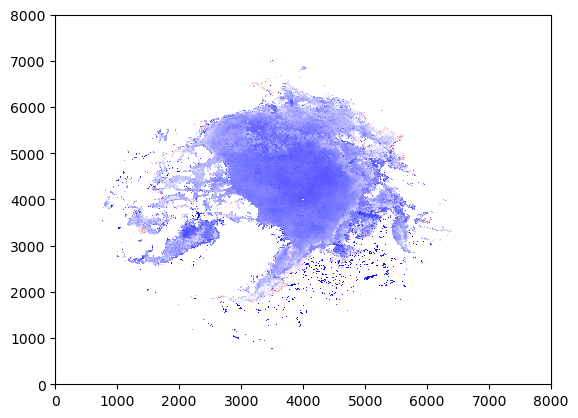

In [7]:
plt.pcolormesh(mpf_interpolated)

In [7]:
# predict MPF using constants provided by Landy et al, 2015

R0 = 65.43
L = 16.14
TAU = 5.15
HNET = 0.025    # hnet between 20 and 40mm from Landy, in metres?

pred_mpf = predict_mpf(MISR, R0, L, TAU, HNET)

# to find the overlap - gives only the points that exist in both sets
mpf_overlap = mpf_interpolated + (0 * pred_mpf)
pred_overlap = pred_mpf + (0 * mpf_interpolated)


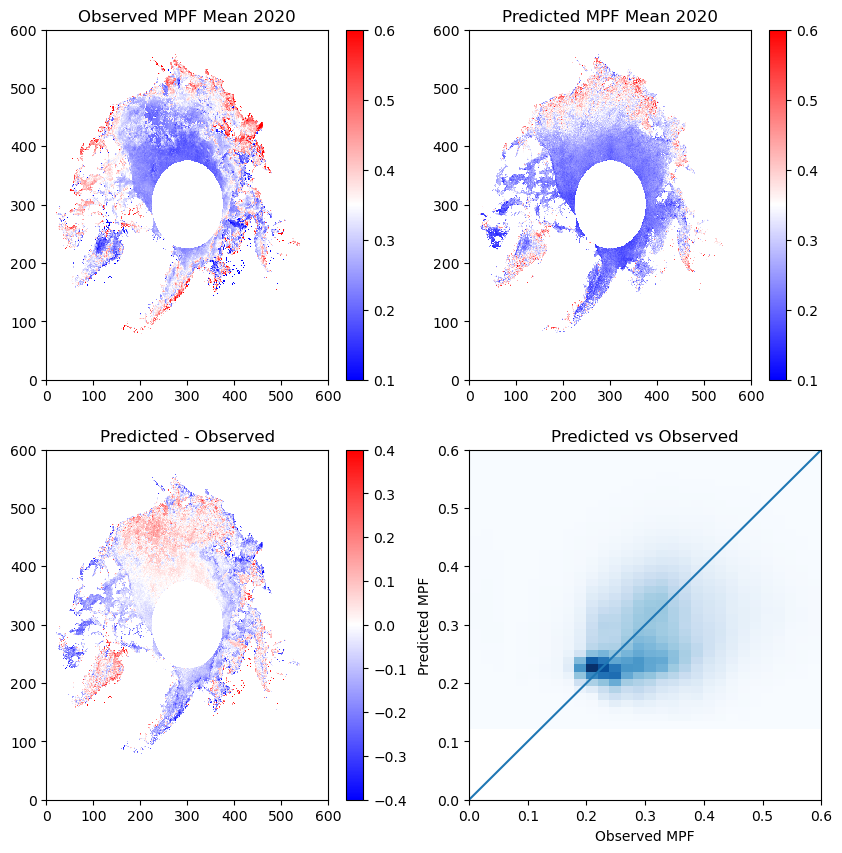

In [8]:
fig = plt.figure(figsize=(10,10))
plt.set_cmap('bwr')

plt.subplot(221)
plt.pcolormesh(mpf_overlap[1000:7000:10, 1000:7000:10], vmin=0.1, vmax=0.6)
plt.colorbar()
plt.title('Observed MPF Mean 2020')

plt.subplot(222)
plt.pcolormesh(pred_overlap[1000:7000:10, 1000:7000:10], vmin=0.1, vmax=0.6)
plt.colorbar()
plt.title('Predicted MPF Mean 2020')

plt.subplot(223)
plt.pcolormesh(pred_overlap[1000:7000:10, 1000:7000:10] - mpf_overlap[1000:7000:10, 1000:7000:10], vmin=-0.4, vmax=0.4)
plt.colorbar()
plt.title('Predicted - Observed')

valid_indices = ~np.isnan(mpf_overlap) & ~np.isnan(pred_overlap)
mpf_overlap_sub = mpf_overlap[valid_indices]
pred_overlap_sub = pred_overlap[valid_indices]

plt.subplot(224)
plt.hist2d(mpf_overlap_sub, pred_overlap_sub, bins=(50,50), cmap='Blues')
plt.xlabel("Observed MPF")
plt.ylabel("Predicted MPF")
plt.title("Predicted vs Observed")
plt.xlim(0,0.6)
plt.ylim(0,0.6)
plt.axline((0, 0), slope=1)

#plt.subplots_adjust(right=1)

#plt.subplots_adjust(bottom=0.1, right=0.8, top=0.9)
#cax = plt.axes((0.85, 0.1, 0.075, 0.8))
#plt.colorbar(cax=cax)



(array([2.40000e+01, 6.46000e+02, 4.73900e+03, 1.93260e+04, 5.85780e+04,
        1.32729e+05, 2.49803e+05, 4.30961e+05, 6.70274e+05, 8.73728e+05,
        9.43232e+05, 8.98676e+05, 8.17391e+05, 7.79458e+05, 8.55435e+05,
        8.46768e+05, 5.69753e+05, 3.15646e+05, 1.85432e+05, 1.21639e+05,
        7.49130e+04, 4.42770e+04, 2.72880e+04, 1.81280e+04, 1.29630e+04,
        9.51200e+03, 6.46600e+03, 4.34800e+03, 2.70000e+03, 1.87700e+03,
        1.15200e+03, 6.56000e+02, 3.54000e+02, 2.62000e+02, 1.53000e+02,
        1.61000e+02, 8.70000e+01, 3.50000e+01, 3.40000e+01, 1.40000e+01,
        1.00000e+01, 1.30000e+01, 3.00000e+00, 2.00000e+00, 3.00000e+00,
        3.00000e+00, 4.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00]),
 array([0.01556186, 0.02382754, 0.03209323, 0.04035891, 0.04862459,
        0.05689028, 0.06515596, 0.07342164, 0.08168732, 0.08995301,
        0.09821869, 0.10648438, 0.11475006, 0.12301575, 0.13128142,
        0.13954711, 0.1478128 , 0.15607847, 0.16434416, 0.172609

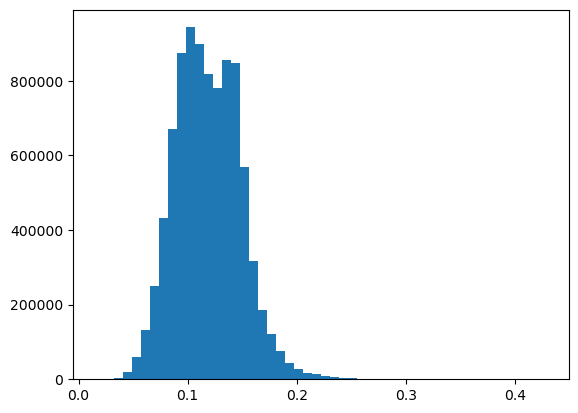

In [27]:
plt.hist(MISR.ravel(), bins=50)

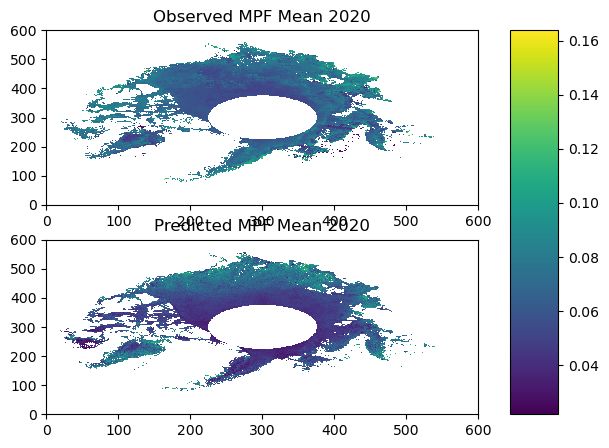

In [25]:
plt.subplot(211)
plt.pcolormesh(mpf_overlap[1000:7000:10, 1000:7000:10])
plt.title('Observed MPF Mean 2020')

plt.subplot(212)
plt.pcolormesh(pred_overlap[1000:7000:10, 1000:7000:10])
plt.title('Predicted MPF Mean 2020')

plt.subplots_adjust(bottom=0.1, right=0.8, top=0.9)
cax = plt.axes((0.85, 0.1, 0.075, 0.8))
plt.colorbar(cax=cax)

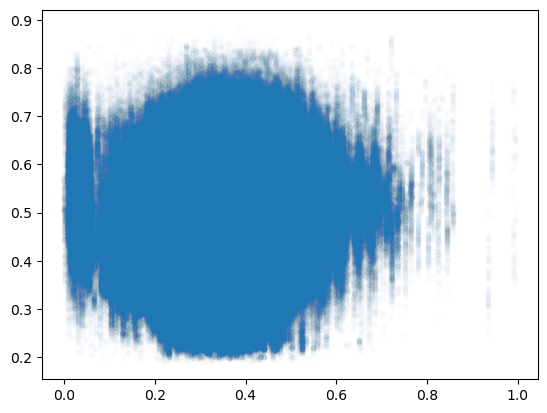

In [15]:
plt.scatter(mpf_overlap, pred_overlap, alpha=0.01, s=10)

In [1]:
# Importing modules to access and visualise data
import xarray as xr # used for netcdf and h5 files, climate data
import h5py
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfea
import pyproj
import datetime
from scipy.interpolate import griddata
from scipy.stats import binned_statistic_2d
import os, sys
from matplotlib.colors import LinearSegmentedColormap

In [3]:
years = os.listdir(f'/home/sl/melt_pond/data')
print(f'Available years: {years}')
years.remove('mp_coordinate.nc')


Available years: ['2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022', 'mp_coordinate.nc', '2000']


In [5]:
# find years which are available for both MPF and SIR
years_lee = os.listdir(f'/home/sl/melt_pond/data')
fns_misr = os.listdir(f'/home/ssureen/MISR_data_monthly')
years_misr = []
for fn in fns_misr:
    years_misr.append(fn[6:10])

years = list(set(years_lee) & set(years_misr))
print(f'Available years: {years}')

Available years: ['2005', '2008', '2004', '2002', '2003', '2016', '2020', '2011', '2006', '2013', '2012', '2017', '2015', '2001', '2018', '2009', '2014', '2010', '2007', '2019', '2000']


In [ ]:



# retrieve MPF coordinates and convert to EASE grid for comparison
try:
    lon_MPF, lat_MPF = MPF_UCL_COORDS('/home/sl/melt_pond/data/mp_coordinate.nc')
    x_MPF, y_MPF = WGS84toEASE2N(lon_MPF, lat_MPF)
    print(f'MPF coordinates successfully retrieved.')
except Exception as e:
    print(f'MPF coordinates could not be retrieved: {e}')
    return

for year in years:
    print(f'{year}')
    # retrieve MISR data for given year
    try:
        MISR_path = f'/home/ssureen/MISR_data_monthly/April {year} Roughness.h5'
        MISR, lon_MISR, lat_MISR, x_MISR, y_MISR = LOAD_MISR(MISR_path)
        print(f'Succesfully retrieved MISR data from {MISR_path}.')
    except Exception as e:
        print(f'MISR data could not be retrieved from {MISR_path}: {e}')
        return
    
    # retrieve MPF data for given year
    try:
        mpf_path = f'/home/sl/melt_pond/data/{year}/MODIS_Meltpond_Fraction_CPOM_5km_monthly_{year}.nc'
        mpf_mean, mpf_may, mpf_june, mpf_july, mpf_aug = LOAD_MPF(mpf_path)
        print(f'Successfully retrieved MPF data from {mpf_path}.')
    except Exception as e:
        print(f'MPF data could not be retrieved from {mpf_path}: {e}')
        return

    try:
        print('Interpolating...')
        # interpolate MPF to MISR grid for each month and mean for the year
        mpf_mean_MISRGRID = interpolate_to_MISR(x_MPF, y_MPF, mpf_mean ,x_MISR, y_MISR )
        masked_MPF_mean_MISRGRID, masked_mean_MISR, masked_lat_mean_MISR = MASK_MPF_MISR(mpf_mean_MISRGRID, MISR, lat_MISR)
        print('Interpolated Mean')

        mpf_may_MISRGRID = interpolate_to_MISR(x_MPF, y_MPF, mpf_may ,x_MISR, y_MISR )
        masked_MPF_may_MISRGRID, masked_may_MISR, masked_lat_may_MISR = MASK_MPF_MISR(mpf_may_MISRGRID, MISR, lat_MISR)
        print('Interpolated May')

        mpf_june_MISRGRID = interpolate_to_MISR(x_MPF, y_MPF, mpf_june ,x_MISR, y_MISR )
        masked_MPF_june_MISRGRID, masked_june_MISR, masked_lat_june_MISR = MASK_MPF_MISR(mpf_june_MISRGRID, MISR, lat_MISR)
        print('Interpolated June')

        mpf_july_MISRGRID = interpolate_to_MISR(x_MPF, y_MPF, mpf_july ,x_MISR, y_MISR )
        masked_MPF_july_MISRGRID, masked_july_MISR, masked_lat_july_MISR = MASK_MPF_MISR(mpf_july_MISRGRID, MISR, lat_MISR)
        print('Interpolated July')

        mpf_aug_MISRGRID = interpolate_to_MISR(x_MPF, y_MPF, mpf_aug ,x_MISR, y_MISR )
        masked_MPF_aug_MISRGRID, masked_aug_MISR, masked_lat_aug_MISR = MASK_MPF_MISR(mpf_aug_MISRGRID, MISR, lat_MISR)
        print('Interpolated August')

        print(f'Succesfully interpolated all months.')
    except Exception as e:
        print(f'Could not interpolate data: {e}')
        return

    fig = plt.figure(figsize=(10,10))

    plt.subplot(221)
    plt.pcolormesh(masked_MPF_may_MISRGRID[2500:6000:10, 2000:6000:10])
    plt.title('Observed MPF May 2020')

    plt.subplot(222)
    plt.pcolormesh(masked_MPF_june_MISRGRID[2500:6000:10, 2000:6000:10])
    plt.title('Observed MPF June 2020')

    plt.subplot(223)
    plt.pcolormesh(masked_MPF_july_MISRGRID[2500:6000:10, 2000:6000:10])
    plt.title('Observed MPF July 2020')

    plt.subplot(224)
    plt.pcolormesh(masked_MPF_mean_MISRGRID[2500:6000:10, 2000:6000:10])
    plt.title('Observed MPF Mean 2020')

    plt.subplots_adjust(bottom=0.1, right=0.8, top=0.9)
    cax = plt.axes((0.85, 0.1, 0.075, 0.8))
    plt.colorbar(cax=cax)

    try:
        fig_fn = f'/home/htweedie/melt_ponds/MPF_figs/MPF_{year}.png'
        plt.savefig(fig_fn, format='png')
        print(f'Figure saved as {fig_fn}.')
    except Exception as e:
        print(f'{year} figure could not be saved: {e}')



def WGS84toEASE2N(lon, lat):
    '''Converts WGS84 coordinates to EASE2N.

    Params:
        lon (array): the WGS84 longitude to convert
        lat (array): the WGS84 latitude to convert

    Returns:
        (x, y): the corresponding EASE2N x and y coordinates
    '''

    proj_EASE2N = pyproj.Proj("+proj=laea +lon_0=0 +lat_0=90 +x_0=0 +y_0=0 +ellps=WGS84 +towgs84=0,0,0,0,0,0,0 +units=m +no_defs")
    proj_WGS84 = pyproj.Proj("+proj=longlat +ellps=WGS84 +datum=WGS84 +no_defs ")
    return pyproj.transform(proj_WGS84, proj_EASE2N, lon, lat)


def LOAD_MISR(MISR_path):
    '''Loads MISR data and coordinates from specified file path.

    Params:
        MISR_path (str): the file path from which to retrieve data

    Returns:
        data (np.array): roughness data retrieved from the specified file
        lon, lat
        x, y
    '''

    file = h5py.File(MISR_path, 'r')
    
    # extract coord data
    lon = np.array(file['GeoLocation']['Longitude'])
    lat = np.array(file['GeoLocation']['Latitude'])
    x = np.array(file['GeoLocation']['x'])
    y = np.array(file['GeoLocation']['y'])

    # extract roughness data
    data = np.array(file['Roughness']['Roughness_2D_svm'])    
    
    file.close()

    return data, lon, lat, x, y


def LOAD_MPF(MPF_path): # Loads data from Sangyun Lee dataset on CPOM servers, just for month of JULY
    '''Loads MPF data for individual months and calculates the pixel-by-pixel mean across all months.

    Params:
        MPF_path (str): the file path from which data will be retrieved

    Returns:
        mean, may, june, july, aug: numpy arrays for the mean and individual months
    '''
    ds = xr.open_dataset(MPF_path)

    # retrieve data for individual months
    may = np.array(ds['may_monthly'])
    june = np.array(ds['june_monthly'])
    july = np.array(ds['july_monthly'])
    aug = np.array(ds['august_monthly'])
 
    # calculate mean over all months
    mean = np.nanmean(np.array([may, june, july, aug]), 0)

    return mean, may, june, july, aug


def MPF_UCL_COORDS(MPF_coords_path): # reads coordinate data from sangyun lee mpf data set
    '''
    Retrieves grid coordinates for MPF data.
    
    Params:
        MPF_coords_path (str): the file path from which the coordinates will be retrieved
        
    Returns:
        lon, lat
    '''
    ds = xr.open_dataset(MPF_coords_path)
    lon = np.asarray(ds['mp_lon'])
    lat = np.asarray(ds['mp_lat'])
        
    return lon, lat


def MASK_MPF_MISR(mpf_MISRGRID, MISR, lat_MISR):
    # Create masks for valid data in each array
    mask1 = ~np.isnan(mpf_MISRGRID)  # Invert the NaN values to get a mask of valid data
    mask2 = ~np.isnan(MISR)

    # Create a joint mask where both arrays have valid data
    joint_mask = mask1 & mask2

    # Use the joint mask to apply the mask to both arrays and corresponding latitude
    masked_MPF_MISRGRID = np.ma.masked_array(mpf_MISRGRID, mask=~joint_mask)
    masked_MISR = np.ma.masked_array(MISR, mask=~joint_mask)
    masked_lat_MISR = np.ma.masked_array(lat_MISR, mask=~joint_mask)

    return masked_MPF_MISRGRID, masked_MISR, masked_lat_MISR


def interpolate_to_MISR(x_in, y_in, data, x_out, y_out):
    '''
    Interpolates data of the shape X_in, Y_in to the shape of X_out, Y_out.
    
    Params:
        data: the data to be interpolated
        x_in, y_in: the shape of the data to be interpolated
        
    Returns:
        x_out, y_out: the shape to which the data will be interpolated'''
    return griddata((x_in.ravel(), y_in.ravel()), data.ravel( ), (x_out.ravel(), y_out.ravel()), 'nearest').reshape(8000,8000) 


if __name__ == '__main__':
    main()
